<a href="https://colab.research.google.com/github/aafaf-arharas/ML_TPs/blob/main/00_notebook_intro_TF2_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


Les versions de TensorFlow 1.X et de Keras (avant intégration à Tensorflow) n'étaient pas nécessairement faciles à manipuler :
- utilisation de graphes de flux de données (TF)
- manque de flexibilité (Keras)

La version 2.x (2.3 au 01/08/2020) repense complètement le paradigme de programmation de Tensorlow, et la flexibilité de Keras. La programmation TF se fait de manière "classique" (à la Numpy), mais conserve les avantages de l'utilisation de graphes de flux de données. Keras devient l'API haut niveau de Tensorflow.


# 1- Tensorflow

## Tenseurs
Les tenseurs sont des matrices n-dimensionnelles

<img src="tenseurs.png" alt="" width="500"/>


### Tenseurs [constants](https://www.tensorflow.org/api_docs/python/tf/constant)

In [ ]:
x = tf.constant([[5, 2], [1, 3]])
print(x)
print('Valeur du tenseur :',x.numpy())
print('Type des données :', x.dtype)
print('Taille du tenseur :', x.shape)
print("\nTenseurs constants particuliers")
print(tf.ones(shape=(2, 1)))
print(tf.zeros(shape=(2, 1)))
print("\nTenseur constant suivant une loi normale")
print(tf.random.normal(shape=(2, 2), mean=0., stddev=1.))
print("\nTenseur constant suivant une loi uniforme")
print(tf.random.uniform(shape=(2, 2), minval=0, maxval=10, dtype='int32'))



tf.Tensor(
[[5 2]
 [1 3]], shape=(2, 2), dtype=int32)
Valeur du tenseur : [[5 2]
 [1 3]]
Type des données : <dtype: 'int32'>
Taille du tenseur : (2, 2)

Tenseurs constants particuliers
tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)

Tenseur constant suivant une loi normale
tf.Tensor(
[[-0.01954025  2.0707676 ]
 [-0.47966263  1.0695186 ]], shape=(2, 2), dtype=float32)

Tenseur constant suivant une loi uniforme
tf.Tensor(
[[0 7]
 [3 5]], shape=(2, 2), dtype=int32)


### Variables
Les [variables](https://www.tensorflow.org/guide/variable) sont des tenseurs particuliers, permettant de stocker des variables amenées à changer (les poids et biais des réseaux de neurones par exemple

In [ ]:
v0 = tf.random.normal(shape=(2, 2))
a = tf.Variable(v0)
print(a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.03426833, -0.85295236],
       [-0.64162886, -1.6059163 ]], dtype=float32)>


La mise à jour des variables s'effectue à l'aide des méthodes `.assign(value)`, ou `.assign_add(increment)` ou `.assign_sub(decrement)`:

In [ ]:
v1 = tf.random.normal(shape=(2, 2))
a.assign(v1)


<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[ 2.2436204 ,  0.71641415],
       [ 0.7086044 , -0.4349614 ]], dtype=float32)>

In [ ]:
v2 = tf.random.normal(shape=(2, 2))
a.assign_add(v2)

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[ 1.0966715 ,  1.8911941 ],
       [ 0.77055335, -1.7175611 ]], dtype=float32)>

### Opérations sur les tenseurs
Les opérations s'effectuent comme avec NumPy. La seule différence étant que le code peut s'exécuter sur GPU et TPU

In [ ]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

c = a + b
d = tf.square(c)
e = tf.exp(d)

print(a,b,c,d,e)

tf.Tensor(
[[0.2327153  0.48638374]
 [2.8005493  1.3387324 ]], shape=(2, 2), dtype=float32) tf.Tensor(
[[-0.22495928 -0.76261586]
 [ 0.36687887 -0.286038  ]], shape=(2, 2), dtype=float32) tf.Tensor(
[[ 0.00775601 -0.27623212]
 [ 3.167428    1.0526943 ]], shape=(2, 2), dtype=float32) tf.Tensor(
[[6.0155686e-05 7.6304182e-02]
 [1.0032600e+01 1.1081654e+00]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1.0000602e+00 1.0792909e+00]
 [2.2756371e+04 3.0287967e+00]], shape=(2, 2), dtype=float32)


## Gradients et dérivées d'ordre supérieur
TensorFlow permet de calculer de manière automatique, à l'aide de [`GradientTape`](https://www.tensorflow.org/api_docs/python/tf/GradientTape), le gradient de toute fonction différentiable. 

In [ ]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

# Utilisation d'un gradient Tape
with tf.GradientTape() as tape:
  tape.watch(a)  # On garde en mémoire les opérations réalisées sur `a`
  f = tf.sqrt(tf.square(a) + tf.square(b))  
  # On cherche le gradient de f par rapport à a
  df_da = tape.gradient(f, a)
  print(df_da)

tf.Tensor(
[[ 0.3290918  -0.9978523 ]
 [-0.04534012  0.24092354]], shape=(2, 2), dtype=float32)


Par défaut, les variables sont mémorisées automatiquement

In [ ]:
a = tf.Variable(a)

with tf.GradientTape() as tape:
  f = tf.sqrt(tf.square(a) + tf.square(b))
  df_da = tape.gradient(f, a)
  print(df_da)

tf.Tensor(
[[ 0.3290918  -0.9978523 ]
 [-0.04534012  0.24092354]], shape=(2, 2), dtype=float32)


Les dérivées d'ordre supérieur se calculent par application itérée de GradientTape:

In [ ]:
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as tape:
    f = tf.sqrt(tf.square(a) + tf.square(b))
    df_da = tape.gradient(f, a)
  d2f_da2 = outer_tape.gradient(df_da, a)
  print(d2f_da2)

tf.Tensor(
[[0.17243034 0.00300026]
 [0.00591475 0.85263574]], shape=(2, 2), dtype=float32)


## Tutorial

Pour illustrer le traitement d'un problème complet sous Tensorflow 2.x, nous nous intéressons au cas de la classification linéaire et n'utilisons que des méthodes simples de Tensorflow (une résolution plus directe de ce problème peut être envisagée en utilisant des fonctions haut niveau de Tensorflow ou même Keras).
On  considère un problème de  classification linéaire dans $\mathbb{R}^2$ avec une fonction de décision de la forme $w^Tx + b$. Les paramètres $w$ et $b$ sont appris à l'aide d'une descente de gradient sur un minibatch.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':


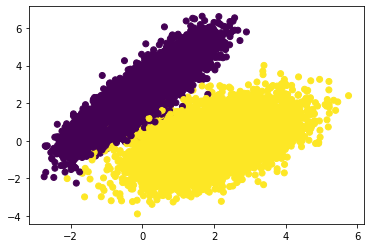

In [ ]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline

# Génération de données : deux classes, loi normale multivariée centrée en (0,4) et (2,0), de même matrices de covariance.
num_samples = 10000
classe0 = np.random.multivariate_normal(mean=[0, 2.5], cov=[[1, 1.5],[0.5, 1]], size=num_samples)
classe1 = np.random.multivariate_normal(mean=[2, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
features = np.vstack((classe0, classe1)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),np.ones((num_samples, 1), dtype='float32')))
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

In [ ]:
input_dim = 2
output_dim = 1
learning_rate = 0.01
batch_size = 256
num_epochs = 20

# vecteur de poids
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# biais
b = tf.Variable(tf.zeros(shape=(output_dim,)))

# Entraînement par minibatch par descente de gradient
def BatchTraining(x, y):
  with tf.GradientTape() as tape:
    # Calcul de la valeur prédite par le modèle
    predictions = tf.matmul(x, w) + b
    # Erreur quadratique moyenne
    loss = tf.reduce_mean(tf.square(y - predictions))
    # Descente de gradient
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

In [ ]:
# Utilisation d'un objet tf.data.Dataset pour une manipulation plus facile des itérations de l'entraînement
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)

t0 = time.time()
for epoch in range(num_epochs):
  for step, (x, y) in enumerate(dataset):
    loss = BatchTraining(x, y)
t_end = time.time() - t0
print('Temps par epoch: %.3f s' % (t_end / num_epochs,))


Temps par epoch: 0.182 s


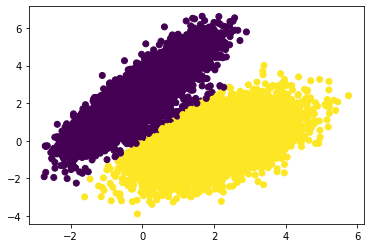

In [ ]:
# Test du modèle sur les données (on n'utilise pas ici d'ensemble de test, on regarde juste pour illustration le comportement du modèle sur les donnnées)
predictions = tf.matmul(features, w) + b
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)

Le code précédent n'utilise pas le graphe de flux de données, proposé par Tensorflow. Or cette structure permet d'accélerer les traitements. Pour illustrer ce fait, on compile la fonction d'entraînement dans un graphe. Tensorflow permet cette compilation simplement en ajoutant le décorateur `tf.function`  

In [ ]:
@tf.function
def BatchTraining(x, y):
  with tf.GradientTape() as tape:
    # Calcul de la valeur prédite par le modèle
    predictions = tf.matmul(x, w) + b
    # Erreur quadratique moyenne
    loss = tf.reduce_mean(tf.square(y - predictions))
    # Descente de gradient
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

In [ ]:
t0 = time.time()
for epoch in range(num_epochs):
  for step, (x, y) in enumerate(dataset):
    loss = BatchTraining(x, y)
t_end = time.time() - t0
print('Time per epoch: %.3f s' % (t_end / num_epochs,))

Time per epoch: 0.059 s


# 2 Keras

Keras est une API Python permettant un prototypage rapide d’applications de deep learning.

## La classe `Layer`

La classe [`Layer`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer) est la classe de base de Keras, qui encapsulate un état (les poids et biais) et des possiblités de calculs (définies dans la méthode `call`). Pour effectuer le calcul $w^Tx + b$ précédent, on construit une classe dérivée de la classe `Layer`

In [ ]:
from tensorflow.keras.layers import Layer

class Linear(Layer):

  def __init__(self, units=32):
      super(Linear, self).__init__()
      self.units = units

  # Poids et biais
  def build(self, input_shape):
      self.w = self.add_weight(shape=(input_shape[-1], self.units),
                               initializer='random_normal',
                               trainable=True)
      self.b = self.add_weight(shape=(self.units,),
                               initializer='random_normal',
                               trainable=True)

  # Calcul effectué par la couche
  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b

In [ ]:
# On instancie un objet
MyLayer = Linear(8)

# On utilise l'instance comme une fonction
y = MyLayer(tf.ones((2, 3)))
print(y)

tf.Tensor(
[[-0.052572    0.10351592 -0.07859853 -0.00373217  0.15328375  0.03951474
  -0.08116271  0.04891318]
 [-0.052572    0.10351592 -0.07859853 -0.00373217  0.15328375  0.03951474
  -0.08116271  0.04891318]], shape=(2, 8), dtype=float32)


L'évolution des poids est automatiquement effecutée à l'aide de la propriété `weights` de la classe `Layer`. 

In [ ]:
assert MyLayer.weights == [MyLayer.w, MyLayer.b]

Les poids peuvent de plus être modifiés ou non pendant l'entraînement. Pour cela, ils sont tagués (booléen `trainable`) et rangés dans des catégories `trainable_weights` et `non_trainable_weights`. Pour déclarer une variable non entraînable, on écrit par exemple dans `__init__` :

`self.myvar = tf.Variable(initial_value=tf.zeros((input_dim,)),trainable=False)`

## Composition de couches
Les couches peuvent être récursivement imbriquées pour former des réseaux de plus grande taille. Chaque couche observe les poids de ses sous-couches (entraînables ou non). Pour créer un empilement de couches linéaires (PMC), on écrit par exemple (en réutilisant la classe `Linear` définie ci-dessus)

In [ ]:
class PMC(Layer):

    def __init__(self):
        super(PMC, self).__init__()
        self.linear_1 = Linear(32)
        self.linear_2 = Linear(32)
        self.linear_3 = Linear(10)

    def call(self, inputs):
        x = self.linear_1(inputs)
        x = tf.nn.relu(x)
        x = self.linear_2(x)
        x = tf.nn.relu(x)
        return self.linear_3(x)

pmc = PMC()

# Le premier appel à pmc créé les poids
y = pmc(tf.ones(shape=(3, 64)))

# Weights are recursively tracked.
print('Il y a ',len(pmc.weights),'matrices de poids dans ce pmc')

Il y a  6 matrices de poids dans ce pmc


## Couches proposées par Keras

Keras propose une grande variétés de  [couches prédéfinies](https://www.tensorflow.org/api_docs/python/tf/keras/layers/),

- couches de convolution (et convolutions transposées)
- couches de pooling (moyenne, max)
- couches LSTM, GRU 
- couche de  BatchNorm
- couche de Dropout
- couche d'attention
- ...

Certaines couches (par exemple `BatchNormalization` ou  `Dropout`) ont des comportements différents suivant la phase (apprentissage ou test) de l'algorithme. Il est alors nécessaire d'utiliser un booléen `training` dans la méthode `call`.

In [ ]:
from tensorflow.keras.layers import Layer

class Dropout(Layer):
  
  def __init__(self, rate):
    super(Dropout, self).__init__()
    self.rate = rate

  def call(self, inputs, training=None):
    if training:
      return tf.nn.dropout(inputs, rate=self.rate)
    return inputs

class PMCWithDropout(Layer):

  def __init__(self):
      super(PMCWithDropout, self).__init__()
      self.linear_1 = Linear(32)
      self.dropout = Dropout(0.5)
      self.linear_3 = Linear(10)

  def call(self, inputs, training=None):
      x = self.linear_1(inputs)
      x = tf.nn.relu(x)
      x = self.dropout(x, training=training)
      return self.linear_3(x)
    
pmc = PMCWithDropout()
# Pendant la phase d'entraînement, le dropout est actif
y_train = pmc(tf.ones((2, 2)), training=True)
# Pendant la phase de test, le dropout est inactif
y_test = pmc(tf.ones((2, 2)), training=False)

## Approche fonctionnelle
Il est possible de créer un réseau de neurones à plusieurs couches, en utilisant une approche fonctionnelle, en spécifiant les unes après les autres les couches. Voici un exemple simple

In [ ]:
# Description des entrées (taille et type) par un objet Input
inputs = tf.keras.Input(shape=(16,))

# Ajout des couches une à une, l'entrée de la couche étant la sortie de la couche précédente
x = Linear(32)(inputs) 
x = Dropout(0.5)(x)
outputs = Linear(10)(x)

# Création du modèle à partir des couches précédentes
model = tf.keras.Model(inputs, outputs)

# Utilisation
y = model(tf.ones((2, 16)))
print(y.shape)

(2, 10)


## Approche séquentielle
Dans le cas de modèles simples, Keras propose également un mode séquentiel

In [ ]:
from tensorflow.keras import Sequential

model = Sequential()
model.add(Linear(32))
model.add(Dropout(0.5))
model.add(Linear(10))
# ce qui peut s'écrire aussi model = Sequential([Linear(32), Dropout(0.5), Linear(10)])

y = model(tf.ones((2, 16)))
print(y.shape)

(2, 10)


## Ingrédients d'un algorithmes d'apprentissage
### Fonctions de perte

Keras propose de nombreuses [fonctions de perte][https://keras.io/api/losses/]

In [ ]:
bce = tf.keras.losses.BinaryCrossentropy()
y_true = [0., 0., 1., 1.]  # Cibles
y_pred = [1., 1., 1., 0.]  # prédictions
loss = bce(y_true, y_pred)
print('Entropie croisée :', loss.numpy())

Entropie croisée : 11.522857


Parfois (en particulier pour les régularisations), la fonction de perte doit être calculée à chaque étape de la passe avant. Keras permet de garder trace de l'évolution de la fonction de perte via la méthode `add_loss`.
Si l'on soutaite par exemple ajouter un terme de régularisation basé sur la norme L2 des entrées, on écrira

In [ ]:
from tensorflow.keras.layers import Layer

class L2InputRegularization(Layer):
  
  def __init__(self, rate=1e-2):
    super(L2InputRegularization, self).__init__()
    self.rate = rate
  
  def call(self, inputs):
    # la fonction de perte dépend des entrées
    self.add_loss(self.rate * tf.reduce_sum(tf.square(inputs)))
    return inputs

Les valeurs de la fonction de perte peuvent alors être récupérées par la propriété `.losses` de n'importe quelle couche ou modèle

In [ ]:
from tensorflow.keras import layers

class PMCRegularise(Layer):

  def __init__(self, output_dim):
      super(PMCRegularise, self).__init__()
      self.dense_1 = layers.Dense(32, activation=tf.nn.relu)
      self.regularization = L2InputRegularization(1e-2)
      self.dense_2 = layers.Dense(output_dim)

  def call(self, inputs):
      x = self.dense_1(inputs)
      x = self.regularization(x)
      return self.dense_2(x)
    

pmcr = PMCRegularise(1)
y = pmcr(tf.ones((10, 10)))

print(pmcr.losses)  

[<tf.Tensor: shape=(), dtype=float32, numpy=0.43419695>]


`layer.losses` contient les valeurs de la fonction de perte créées dans la dernière passe avant (pas d'accumulation). Pour les utiliser pendant la phase d'entraînement, on peut donc être amené à les sommer.

In [ ]:
# Exemple de jeu de données (MNIST)
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
dataset = tf.data.Dataset.from_tensor_slices(
    (x_train.reshape(60000, 784).astype('float32') / 255, y_train))
dataset = dataset.shuffle(buffer_size=1024).batch(64)

pmcr = PMCRegularise(10)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

for step, (x, y) in enumerate(dataset):
  with tf.GradientTape() as tape:
    # passe avant
    logits = pmcr(x)

    # perte pour ce batch
    loss = loss_fn(y, logits)
    
    # On y ajoute la perte calculée pendant la passe avant
    loss += sum(pmcr.losses)
     
    # gradient de la perte par rapport aux poids
    gradients = tape.gradient(loss, pmcr.trainable_weights)
  
  # Mise à jour
  optimizer.apply_gradients(zip(gradients, pmcr.trainable_weights))
  
  # Logging.
  if step % 100 == 0:
    print('Etape  %d, perte : %.3f' % (step, loss))

Etape  0, perte : 4.364
Etape  100, perte : 2.299
Etape  200, perte : 2.281
Etape  300, perte : 2.249
Etape  400, perte : 2.166
Etape  500, perte : 2.116
Etape  600, perte : 1.954
Etape  700, perte : 2.018
Etape  800, perte : 1.844
Etape  900, perte : 1.901


### Métriques

De même, l'API propose de nombreuses [métriques][https://keras.io/api/metrics/]. La mise à jour d'une métrique s'effectue à l'aide de la méthode `update_state`, et l'accès à la valeur s'effectue par la propriété `result

In [ ]:
m = tf.keras.metrics.Recall()
m.update_state([0, 1, 1, 1], [0, 1, 0, 0])
print('Résultat intermédiaire :', m.result().numpy())

m.update_state([1, 1, 1, 1], [0, 1, 1, 0])
print('Résultat final :', m.result().numpy())

Résultat intermédiaire : 0.33333334
Résultat final : 0.42857143


Il est possible de définir sa propre métrique (parfois très utile) en surchargeant la class  `Metric`. Pour cela il faut 

- Créer les variables d'état dans  `__init__`
- Mettre à jour les variables étant données `y_true` and `y_pred` dans `update_state`
- Renvoyer le résultat dans  `result`
- effacer l'état courant avec  `reset_states`

Et par exemple :

In [ ]:
class BinaryTruePositives(tf.keras.metrics.Metric):

  def __init__(self, name='binary_true_positives', **kwargs):
    super(BinaryTruePositives, self).__init__(name=name, **kwargs)
    self.true_positives = self.add_weight(name='tp', initializer='zeros')

  def update_state(self, y_true, y_pred, sample_weight=None):
    y_true = tf.cast(y_true, tf.bool)
    y_pred = tf.cast(y_pred, tf.bool)

    values = tf.logical_and(tf.equal(y_true, True), tf.equal(y_pred, True))
    values = tf.cast(values, self.dtype)
    if sample_weight is not None:
      sample_weight = tf.cast(sample_weight, self.dtype)
      values = tf.multiply(values, sample_weight)
    self.true_positives.assign_add(tf.reduce_sum(values))

  def result(self):
    return self.true_positives

  def reset_states(self):
    self.true_positive.assign(0)

m = BinaryTruePositives()
m.update_state([0, 1, 1, 1], [0, 1, 0, 0])
print('Résultat intermédiaire:', m.result().numpy())

m.update_state([1, 1, 1, 1], [0, 1, 1, 0])
print('Résultat final :', m.result().numpy())

Résultat intermédiaire: 1.0
Résultat final : 3.0


### Optimiseurs

Les [optimiseurs][https://keras.io/api/optimizers/] ... optimisent la métrique lors de la phase d'apprentissage. Une fois le modèle créé, la fonction de perte définie, l'optimiseur est déclaré (par exemple `optimizer = tf.keras.optimizers.Adam()`) et utilisé dans la phase d'apprentissage



## Un exemple complet
Pour résumer, voici un exemple complet de classification des données MNIST.

In [ ]:
from tensorflow.keras import layers

# Données MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:].reshape(60000, 784).astype('float32') / 255

# Utilisation d'un objet tf.data.Dataset pour une manipulation plus facile des itérations de l'entraînement
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(buffer_size=1024).batch(64)

# Modèle simple de classification : utilisation de l'approche séquentielle
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# Fonction de perte
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Métrique
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Optimiseur 
optimizer = tf.keras.optimizers.Adam()

# Boucle d'apprentissage
for step, (x, y) in enumerate(dataset):
  # Ouverture d'un GradientTape.
  with tf.GradientTape() as tape:

    # Passe avant.
    logits = model(x)

    # Perte pour le batch courant
    loss_value = loss(y, logits)
     
  # Dradients
  gradients = tape.gradient(loss_value, model.trainable_weights)
  
  # Mise à jour des poids.
  optimizer.apply_gradients(zip(gradients, model.trainable_weights))

  # Mise à jour de la précision.
  accuracy.update_state(y, logits)
  
  # Logging.
  if step % 100 == 0:
    print('Iter %d Précision: %.3f' % (step,accuracy.result()))

Iter 0 Précision: 0.062
Iter 100 Précision: 0.834
Iter 200 Précision: 0.874
Iter 300 Précision: 0.893
Iter 400 Précision: 0.906
Iter 500 Précision: 0.914
Iter 600 Précision: 0.921
Iter 700 Précision: 0.926
Iter 800 Précision: 0.930
Iter 900 Précision: 0.933


In [ ]:
x_test = x_test[:].reshape(10000, 784).astype('float32') / 255
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(128)

accuracy.reset_states()  # This clears the internal state of the metric

for step, (x, y) in enumerate(test_dataset):
  logits = model(x)
  accuracy.update_state(y, logits)

print('Précision ensemble de test : %.3f' % accuracy.result())

Précision ensemble de test : 0.089


In [ ]:
X=[[0,0],[0,1],[1,0],[1,1]]
print(X.shape())

AttributeError: ignored

## Boucle d'apprentissage
Keras propose d'implémenter la boucle d'apprentissage, et d'éviter d'écrire la boucle sur les epochs et sur les batchs. Une fois l'optimiseur, la métrique et la fonction de perte définis, la méthode `compile` permet de configurer ces éléments dans le modèle


In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

L'ensemble de ces caractéristiques permet alors d'entraîner le modèle, par un simple appel à la méthode  `fit` (qui utilise par défaut des graphes de flux)

In [ ]:
model.fit(dataset, epochs=3)
# Il est également possible de faire un fit directement sur les tableaux numpy : 
#model.fit(x_train, y_train,
#         epochs=3,
#          batch_size=64)

Epoch 1/3
938/938 [==============================] - 9s 10ms/step - loss: 0.2160 - sparse_categorical_accuracy: 0.9370
Epoch 2/3
938/938 [==============================] - 6s 6ms/step - loss: 0.0831 - sparse_categorical_accuracy: 0.9745
Epoch 3/3
938/938 [==============================] - 6s 6ms/step - loss: 0.0571 - sparse_categorical_accuracy: 0.9817


Une fois le modèle entraîné, il est possible d'évaluer sa précision sur l'ensemble de test par un appel à la méthode `evaluate`

In [ ]:
x_test = x_test[:].reshape(10000, 784).astype('float32') / 255
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(128)

loss, acc = model.evaluate(test_dataset)
print('Perte : %.3f \t Précision : %.3f' % (loss, acc))

79/79 [==============================] - 0s 5ms/step - loss: 0.0853 - sparse_categorical_accuracy: 0.9756
loss: 0.085 - acc: 0.976


Et l'exemple global sur les données MNIST devient 

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255

num_val_samples = 10000
x_val = x_train[-num_val_samples:]
y_val = y_train[-num_val_samples:]
x_train = x_train[:-num_val_samples]
y_train = y_train[:-num_val_samples]

# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[accuracy])
model.fit(x_train, y_train,
          validation_data=(x_val, y_val),
          epochs=3,
          batch_size=64)

x_test = x_test[:].reshape(10000, 784).astype('float32') / 255
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(128)

loss, acc = model.evaluate(test_dataset)
print('Sur l ensemble de test : Perte : %.3f \t Précision : %.3f' % (loss, acc))

Epoch 1/3
782/782 [==============================] - 1s 2ms/step - loss: 0.2452 - sparse_categorical_accuracy: 0.9272 - val_loss: 0.1248 - val_sparse_categorical_accuracy: 0.9602
Epoch 2/3
782/782 [==============================] - 1s 1ms/step - loss: 0.0961 - sparse_categorical_accuracy: 0.9709 - val_loss: 0.0916 - val_sparse_categorical_accuracy: 0.9729
Epoch 3/3
79/79 [==============================] - 0s 1ms/step - loss: 0.0825 - sparse_categorical_accuracy: 0.9745
Perte : 0.083 	 Précision : 0.975



## Callbacks

En utilisant la méthode compile/fit, il est possible de contrôler ce qui se passe durant l'entraînement, en utilisant des [callbacks](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/). Un callback est un objet appelé à diverses phases de l'entraînement (à la fin de la présentation d'un batch, à la fin d'une epoch), et permettant :
- de contrôler l'entraînement (early stopping, décroissance du learning rate..)
- de sauver un modèle
- ...
Il existe de nombreux callbacks disponibles sous Keras, et il est même possible d'écrire ses propres objets.

Si on veut pouvoir éviter le sur apprentissage, il est possible d'utiliser la technique du Early Stopping, en appelant le callback approprié. Dans l'exemple qui suit, on utilise cette stratégie, couplée à la sauvegarde automatique du meilleur des modèles entraîné.

In [ ]:

model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])


loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
accuracy = tf.keras.metrics.sparse_categorical_accuracy
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,loss=loss,metrics=[accuracy])

callbacks = [tf.keras.callbacks.EarlyStopping(),
             tf.keras.callbacks.ModelCheckpoint(filepath='bestModel',save_best_only=True)]

model.fit(x_train, y_train,epochs=30,batch_size=64,callbacks=callbacks)

Epoch 1/30
782/782 [==============================] - 1s 2ms/step - loss: 0.2404 - sparse_categorical_accuracy: 0.9287
Epoch 2/30
782/782 [==============================] - 1s 2ms/step - loss: 0.0929 - sparse_categorical_accuracy: 0.9713
Epoch 3/30
782/782 [==============================] - 1s 2ms/step - loss: 0.0602 - sparse_categorical_accuracy: 0.9813
Epoch 4/30
782/782 [==============================] - 1s 2ms/step - loss: 0.0419 - sparse_categorical_accuracy: 0.9870
Epoch 5/30
782/782 [==============================] - 1s 2ms/step - loss: 0.0329 - sparse_categorical_accuracy: 0.9897
Epoch 6/30
782/782 [==============================] - 2s 2ms/step - loss: 0.0286 - sparse_categorical_accuracy: 0.9906
Epoch 7/30
782/782 [==============================] - 1s 2ms/step - loss: 0.0229 - sparse_categorical_accuracy: 0.9925
Epoch 8/30
469/782 [================>.............] - ETA: 0s - loss: 0.0179 - sparse_categorical_accuracy: 0.9935

KeyboardInterrupt: 

## Chargement et sauvegarde d'un modèle
Terminons par les méthodes permettant de charger ou sauver un modèle entraîné 
- Un appel à `model.save(nom_modele)` permet de sauver le modèle courant 
- Un appel à `model = keras.models.load_model(nom_modele)`permet de charger un modèle stocké sur disque

Ce qui est sauvé / chargé : l'architecture du réseau, les poids/biais, les informations de compilation (l'optimiseur, la métrique, la fonction de perte). Deux formats sont possibles pour les fichiers modèle : le format Tensorflow `SavedModel` (par défaut), et le format `h5`
